# Aprendizaje Supervisado - Regresión

En este notebook comenzamos a trabajar en los problemas de **Regresión**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Regresión en Machine Learning consiste en aprender etiquetas numéricas contínuas *y* a partir de un conjunto de atributos/features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

En la primera sección, vamos a comenzar introduciendo un dataset sintético unidimensional (un atributo + *y*), siguiendo una relación lineal. Y trataremos de aprender a predecir usando los siguientes modelos: Regresión Lineal, Árboles de Decisión y kNN. Luego, veremos cómo son las curvas obtenidas para cada modelo y cómo son los errores.

En la segunda sección, pasaremos a dos atributos (2D), el límite de lo que podremos visualizar. ¡Pero esto no significa que no podamos trabajar con más atributos!

## 1. Un atributo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 500 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente y la ordenada al origen. Además, presta atención a que le sumamos *ruido*, para simular una situación un poco más realista.

In [2]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2
# y_real = X**2

y = y_real + 1.0*np.random.randn(n) #devueve una muestra de distribucion estandar normal

Y graficamos los puntos obtenidos junto con la curva teórica.

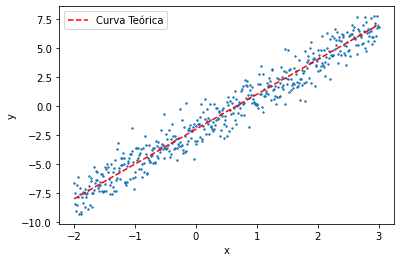

In [5]:
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

In [13]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Definimos los modelos y entrenamos

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [15]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Veamos qué aprendieron.

La regresión lineal obtiene la pendiente y la ordenada al origen.

In [16]:
print(linear_model.coef_, linear_model.intercept_)

[3.00205075] -2.017775568864708


¿Están cerca de los valores reales? 

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

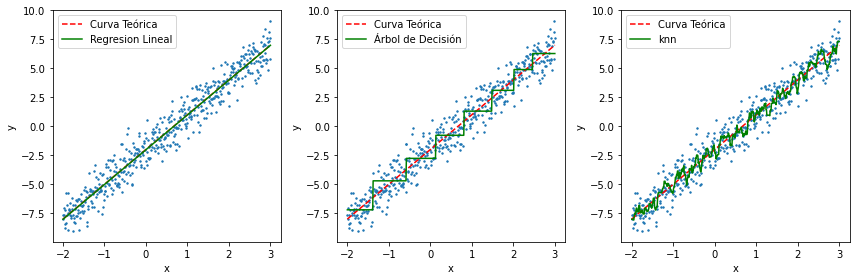

In [17]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Prestar atención a que la regresión lineal hace un muy buen trabajo en reproducir la curva teórica. ¿Qué te parecen los otros modelos?

Veamos qué aprendió el árbol:

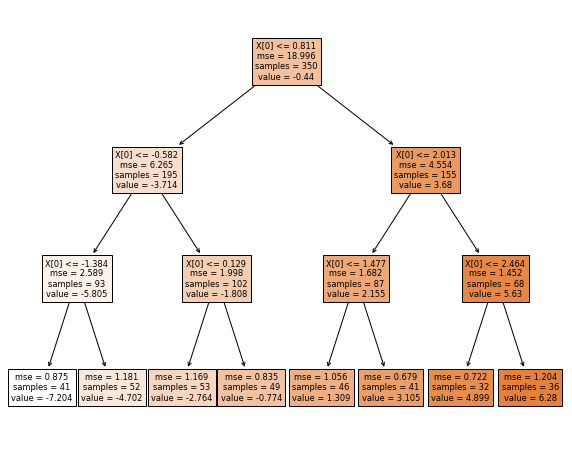

In [18]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

**Para pensar:** ¿Cómo se relaciona este arbol con la curva obtenida?

Veamos ahora cómo son los errores obtenidos. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:
1. El cálculo del RMSE para cada conjunto (train y test).
1. Un gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test. ¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
1. El histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.9833191450315294
Raíz del error cuadrático medio en Test: 0.9987563312895518


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


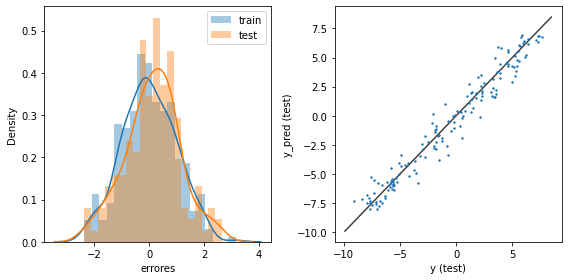

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.9900748398235384
Raíz del error cuadrático medio en Test: 1.2269623598207544


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


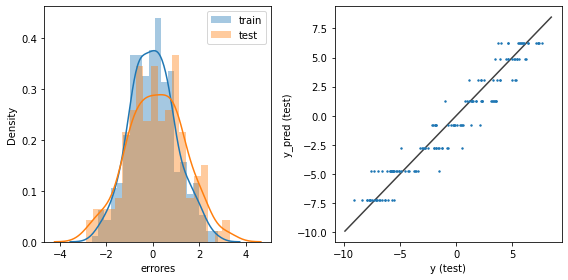

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.8590617765265056
Raíz del error cuadrático medio en Test: 1.1204469918735862


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


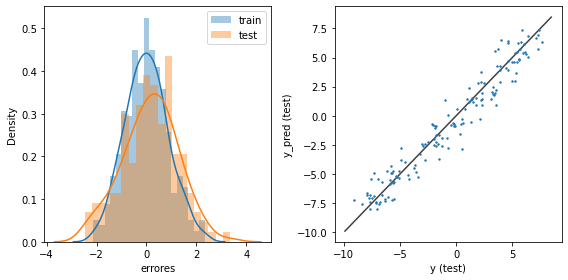

In [19]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En todos los casos, ocurre algo parecido:
1. Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
1. En el gráfico $y$ vs $y_{predicho}$ para el conjunto de test, todos los puntos están cerca de la diagonal (la relación $y = x$), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. **Importante:** asegúrate de que entiendes este gráfico (¿qué ocurre en el caso del árbol?), el hecho de que los puntos deban estar sobre la recta diagonal $y = x$ **no** está relacionado con que estamos aproximando una relación lineal.

**Para probar**: dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`. ¿Qué ocurre cuando `n_neighbors = 1`?¿Puedes diferenciar en el gráfico cuáles instancias se usaron para entrenamiento y cuáles para testeo?¿Y si `n_neighbors` tiende a la cantidad de instancias en el set de entrenamiento qué sucede?

**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Presta atención a las siguientes preguntas. ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?

## 2. Dos atritutos

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [20]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)
# y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.


Visualizamos. El código es un poco más complejo, no te preocupes si no lo entiendes de

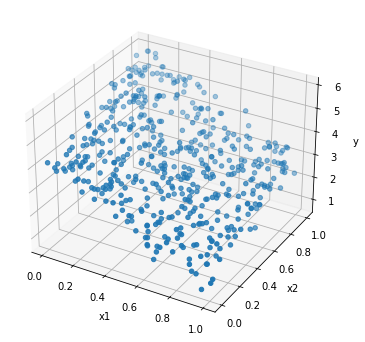

In [21]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

Creamos los atributos y hacemos un `train_test_split`

In [22]:
X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


Definimos los modelos y entrenamos

In [23]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [24]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Veamos qué aprendieron.

La regresión lineal obtiene **las pendientes** y la ordenada al origen

In [25]:
print(linear_model.coef_, linear_model.intercept_)

[-2.94823646  2.03787218] 3.9606058578282504


En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar.

In [26]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

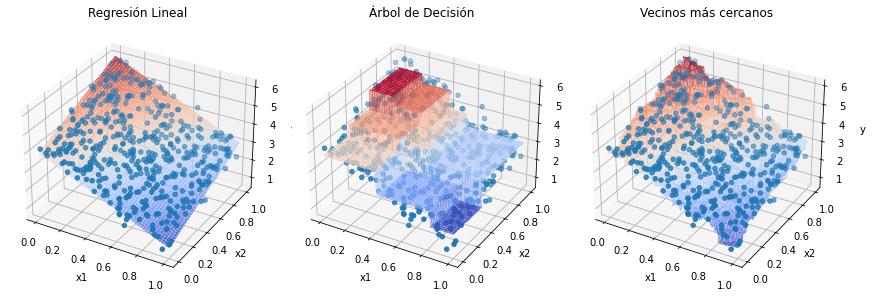

In [29]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)


ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('Vecinos más cercanos')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()



Veamos qué aprendió el árbol:

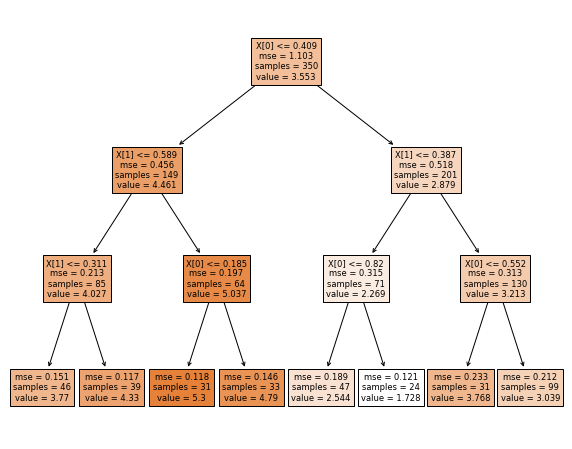

In [30]:
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Y, nuevamente, los errores.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.25524914257972436
Raíz del error cuadrático medio en Test: 0.2732309614319798


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


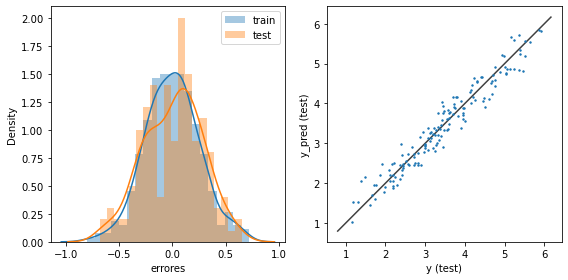

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.413838697947622
Raíz del error cuadrático medio en Test: 0.5108264767606185


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


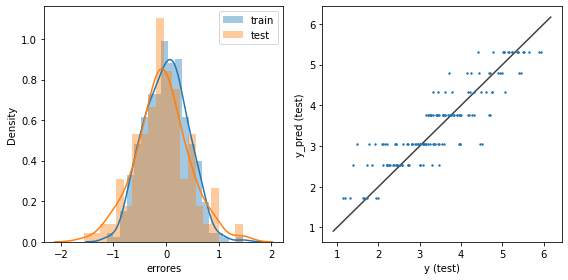

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.18251872137081285
Raíz del error cuadrático medio en Test: 0.3384288224444648


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


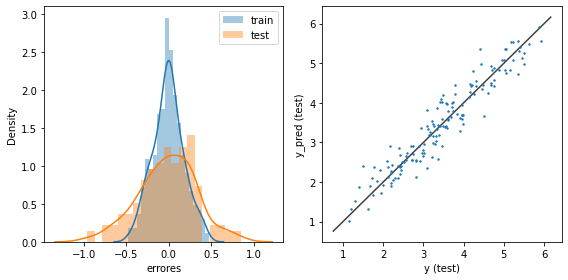

In [28]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Para probar**: nuevamente, dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`.

**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Vuelve a responder: ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?

## 3. Ejercitación 

Si ya estuviste mirando el primer proyecto, verás que se trata de un problema de regresión. Así, ¡aplica lo aprendido en él!

In [1]:
#Ver https://github.com/jaelnasiff/1.Primer_Proyecto_ML.git